In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
df = pd.read_csv("personal_salary_data_cleaned.csv")

In [8]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'age',
       'python_yn', 'spark', 'aws', 'excel'],
      dtype='object')

In [9]:
def title_simplifier(title):
    if "data scientist" in title.lower():
        return "data scientist"
    elif "data engineer" in title.lower():
        return "data engineer"
    elif "analyst" in title.lower():
        return "analyst"
    elif "machine learning" in title.lower():
        return "machine learning"
    elif "manager" in title.lower():
        return "manager"
    elif "director" in title.lower():
        return "director"
    else:
        return "na"
    
def seniority(title):
    if "sr" in title.lower() or "senior" in title.lower() or "lead" in title.lower() or "principal" in title.lower():
        return "senior"
    elif "jr" in title.lower() or "jr." in title.lower():
        return "jr"
    else:
        return "na"

In [76]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.job_simp.value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
manager              22
machine learning     22
director             14
Name: job_simp, dtype: int64

In [77]:
df['senority'] = df['Job Title'].apply(seniority)
df.senority.value_counts()

na        520
senior    220
jr          2
Name: senority, dtype: int64

In [118]:
#fix LA as state
df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip() != "Los Angeles" else "CA")
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [78]:
# Job description Length
df['desc_len'] = df["Job Description"].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [79]:
#competitor count
df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != "-1" else 0)

In [80]:
df['num_competitors']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_competitors, Length: 742, dtype: int64

In [74]:
#Hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.min_salary, axis =1)
df[ df.hourly == 1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
165,1,68,96
177,1,84,136
197,1,72,100
202,1,84,136
210,1,60,100
246,1,68,96
271,1,84,136
337,1,72,100
345,1,96,156
357,1,84,136


In [83]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [84]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,spark,aws,excel,desc_len,num_competitors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.068733,127.183288,100.626011,0.557951,46.591644,0.528302,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,31.869282,46.909006,38.855948,0.496965,53.778815,0.499535,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,10.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


<AxesSubplot:>

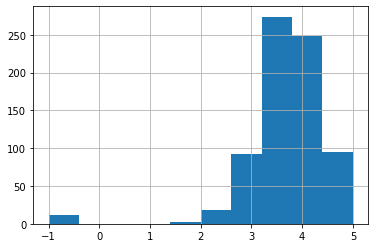

In [87]:
df.Rating.hist()

<AxesSubplot:>

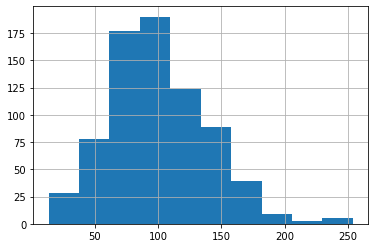

In [88]:
df.avg_salary.hist()

<AxesSubplot:>

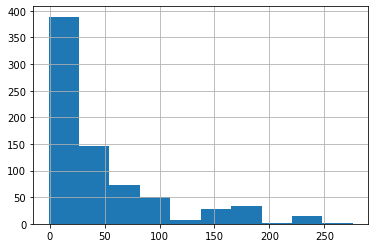

In [89]:
df.age.hist()

<AxesSubplot:>

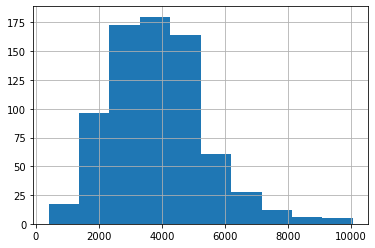

In [90]:
df.desc_len.hist()

<AxesSubplot:>

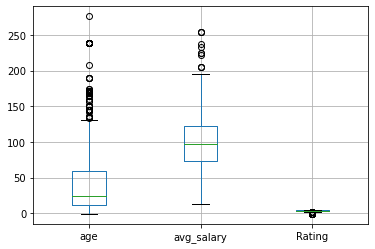

In [94]:
df.boxplot(column = ['age','avg_salary','Rating'])

In [96]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

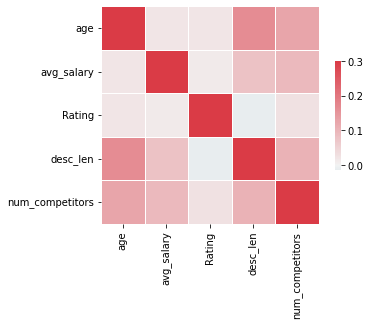

In [105]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len', 'num_competitors']].corr(), vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [104]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'age',
       'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'senority',
       'desc_len', 'num_competitors'],
      dtype='object')

In [107]:
df_categories = df[['Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 
    'same_state', 'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'senority',]]

In [ ]:
for i in df_categories.columns:
    cat_num = df_categories[i].value_counts()
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

Graph for Location: total = 20


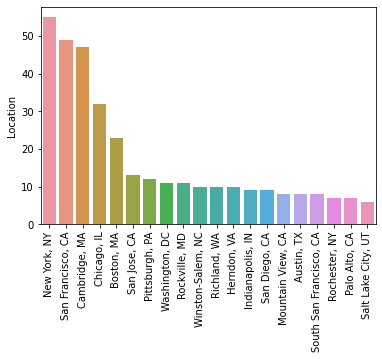

Graph for Headquarters: total = 20


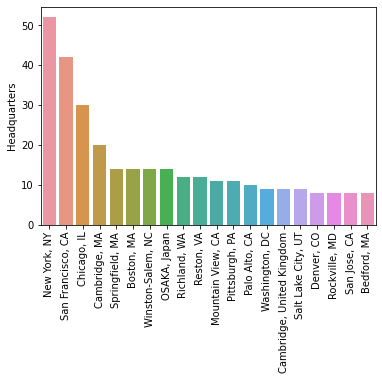

Graph for company_txt: total = 20


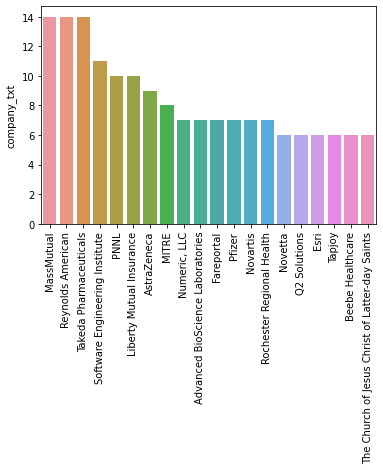

In [125]:
for i in df_categories[['Location', 'Headquarters', 'company_txt']].columns:
    cat_num = df_categories[i].value_counts()[:20]
    print("Graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [126]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'age',
       'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'senority',
       'desc_len', 'num_competitors'],
      dtype='object')

In [129]:
pd.pivot_table(df, index = ['job_simp', 'senority'], values = 'avg_salary')

avg_salary
job_simp         senority            
analyst          jr         56.500000
                 na         61.155405
                 senior     79.092593
data engineer    na         96.701220
                 senior    124.689189
data scientist   jr        106.500000
                 na        107.043011
                 senior    138.956522
director         na        168.607143
machine learning na        119.133333
                 senior    142.071429
manager          na         84.022727
na               na         73.988189
                 senior    109.061404

In [143]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index = ['job_state', 'job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                    
WI        na                         4
          data scientist             3
          analyst                    3
WA        na                         1
          data scientist            17
          analyst                    3
VA        na                         5
          machine learning           2
          data scientist            18
          data engineer             10
          analyst                    6
UT        data engineer              3
          analyst                    4
          data scientist             3
TX        na                         7
          data scientist            13
          data engineer              8
TN        data scientist             1
          data engineer             10
          analyst                    2
SC        na                         1
RI        analyst                    1
PA        machine learning           7
          data engineer              1
          data scientist             6
          analyst                    8
          manager                    3
          na                         8
OR        data scientist             3
          data engineer              1
OH        na                         3
          data scientist             7
          analyst                    4
NY        na                        12
          machine learning           2
          data scientist            40
          data engineer              4
          analyst                   14
NM        data scientist             3
NJ        data scientist             4
          analyst                    6
          data engineer              2
          manager                    2
          director                   2
          na                         1
NE        na                         4
NC        na                        12
          data scientist             3
          data engineer              6
MO        na                         3
          manager                    1
          data scientist             3
          analyst                    2
MN        data engineer              1
          analyst                    1
MI        manager                    2
          data scientist             4
MD        na                        16
          data scientist            13
          data engineer              3
          analyst                    3
MA        na                        46
          manager                    5
          director                   6
          data scientist            30
          data engineer             12
          analyst                    4
LA        analyst                    1
          data engineer              2
          na                         1
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        na                         4
          data scientist             2
          data engineer              4
IL        analyst                    3
          na                         6
          machine learning           2
          director                   6
          data scientist            15
          data engineer              8
ID        analyst                    2
IA        analyst                    2
          data engineer              3
GA        data scientist             3
          na                         3
FL        data scientist             7
          data engineer              3
          analyst                    6
DE        na                         6
DC        data scientist             5
          data engineer              4
          analyst                    2
CT        na                         3
          data scientist             2
CO        machine learning           1
          data engineer              3
          analyst                    1
          na                         3
          data scientist             3
CA        n

In [146]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = ['job_state', 'job_simp'], values = 'avg_salary').sort_values('avg_salary', ascending = False)

,,avg_salary
job_state,job_simp,
DC,data scientist,149.000000
CA,data scientist,142.522059
UT,data scientist,140.500000
MO,data scientist,127.666667
IL,data scientist,117.233333
NC,data scientist,117.000000
NY,data scientist,115.250000
MA,data scientist,113.750000
WI,data scientist,113.500000


In [148]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'age',
       'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'senority',
       'desc_len', 'num_competitors'],
      dtype='object')

In [151]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of ownership

In [176]:
df_pivots = df[['Rating', 'Location', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_competitors',
       'hourly', 'employer_provided', 'python_yn', 'spark', 'aws', 'excel', 'avg_salary']]

In [177]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Location
                                   avg_salary
Location                                     
Bellevue, WA                       184.500000
Lake Forest, IL                    179.500000
Mountain View, CA                  177.187500
Novato, CA                         168.000000
Burbank, CA                        164.000000
Emeryville, CA                     

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [173]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'job_state', 'same_state', 'age',
       'python_yn', 'spark', 'aws', 'excel', 'job_simp', 'senority',
       'desc_len', 'num_competitors'],
      dtype='object')

In [184]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc = 'count')

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(interpolation="bilinear")
plt.axis('off')
plt.show()